#Environment Setup And Imports, Loading The Dataset

In [ ]:
#@title Kaggle Setup For Colab {display-mode: "form"}

! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#@title Download and Unzip The Data {display-mode: "form"}
#Don't download the images, file size too large
! kaggle competitions download h-and-m-personalized-fashion-recommendations -f articles.csv
! kaggle competitions download h-and-m-personalized-fashion-recommendations -f customers.csv
! kaggle competitions download h-and-m-personalized-fashion-recommendations -f transactions_train.csv
! unzip articles.csv.zip
! unzip customers.csv.zip
! unzip transactions_train.csv.zip

  0% 0.00/4.26M [00:00<?, ?B/s]
100% 4.26M/4.26M [00:00<00:00, 100MB/s]
 94% 92.0M/97.9M [00:00<00:00, 139MB/s]
100% 97.9M/97.9M [00:00<00:00, 144MB/s]
 99% 577M/584M [00:04<00:00, 97.6MB/s]
100% 584M/584M [00:04<00:00, 126MB/s] 
Archive:  articles.csv.zip
  inflating: articles.csv            
Archive:  customers.csv.zip
  inflating: customers.csv           
Archive:  transactions_train.csv.zip
  inflating: transactions_train.csv  


In [ ]:
#@title Library Imports {display-mode: "form"}

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from tqdm import tqdm

In [ ]:
#@title Load The Data {display-mode: "form"}
articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')
transactions = pd.read_csv('transactions_train.csv')

#EDA

## Articles Data
Let's start with the articles data and take a look at the features

-  <b>article_id(int)</b>: Id of the clothing
-  <b>product_code(int)</b>
-  <b>prod_name(str)</b>: Name of the product, includes category information
-  <b>product_type_no(int)</b>: Category code, can be based on product_group_name
-  <b>product_type_name(str)</b>: Subcategory name (ie: trousers, leggins, pants)
-  <b>product_group_name(nominal)</b>: Product category (ie: underwear, garment upper body)
-  <b>graphical_appearance_no(int)</b>
-  <b>graphical_appearance_name(nominal)</b>: Describes if the clothing has any design or pattern on it. (ie: solid, stripe)
-  <b>colour_group_code(int), colour_group_name(nominal)</b>
-  <b>perceived_colour_value_id(int), perceived_colour_value_name(nominal)</b>
-  <b>perceived_colour_master_id(int), perceived_colour_master_name(nominal)</b>
-  <b>department_no(int), department_name(nominal)</b>
-  <b>index_code(str), index_name(nominal)</b>
-  <b>index_group_no(int),index_group_name(nominal)</b>
-  <b>section_no(int), section_name(nominal)</b>
-  <b>garment_group_no(int), garment_group_name(nominal)</b>
-  <b>detail_desc(str):</b>Detailed description of the item (ie: Sweatshirt in soft organic cotton with a  press-stud on one shoulder)

In [ ]:
#@title {display-mode: "form"}
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


Most of the features are paired as id and name, data types are int and string. Features are nominal, no ordinal features in the articles data.

In [ ]:
#@title {display-mode: "form"}
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [ ]:
#@title {display-mode: "form"}
print("The size of the articles file is: ", articles.shape, "\n")
print("The number of null entries in 105542 rows for each feature are:\n")
articles.isnull().sum()

The size of the articles file is:  (105542, 25) 

The number of null entries in 105542 rows for each feature are:



article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

This is a relatively large dataset with 100k+ rows of data. And almost none of the feature have any missing values, except for detail_desc.

In [ ]:
#@title {display-mode: "form"}
print("The number of items in each category are:\n")
pd.value_counts(articles['index_name'])

The number of items in each category are:



Ladieswear                        26001
Divided                           15149
Menswear                          12553
Children Sizes 92-140             12007
Children Sizes 134-170             9214
Baby Sizes 50-98                   8875
Ladies Accessories                 6961
Lingeries/Tights                   6775
Children Accessories, Swimwear     4615
Sport                              3392
Name: index_name, dtype: int64

Ladieswear, Divided, Menswear and Children categories make up most of the data. Let's visualize this with a distplot.

Let's look at the distribution of products for each category, which is product_group_name.

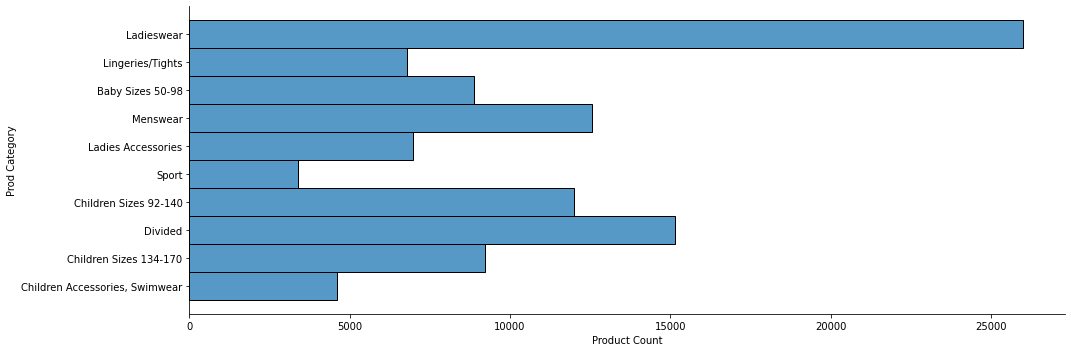

In [ ]:
#@title {display-mode: "form"}
ax = sns.displot(data=articles, y='index_name', aspect=3)
ax.set_axis_labels('Product Count', 'Prod Category')

It can now be seen easier that the dominant category is Ladieswear, which has almost as much products as Divided (unisex products of h&m) and Menswear combined.

### Distribution of Categories (menswear, ladieswear, divided etc.) in the product categories (trousers, shirts etc.)

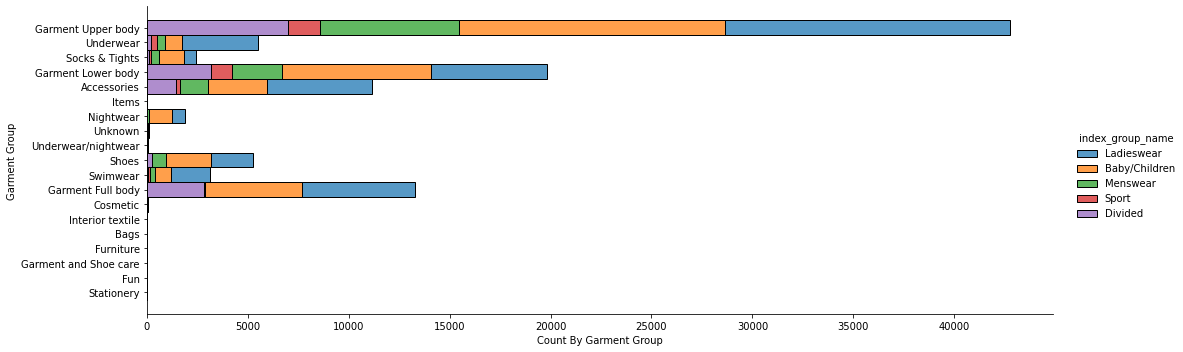

In [ ]:
#@title
ax = sns.displot(data=articles, y='product_group_name', color='orange', hue='index_group_name', multiple='stack', aspect=3)
ax.set_axis_labels('Count By Garment Group', 'Garment Group')

A more detailed plot of product subcategories in the index_group_name categories. Let's examine a few. Shoes category is mainly for women and children, knitwear and trousers look more evenly distributed. 

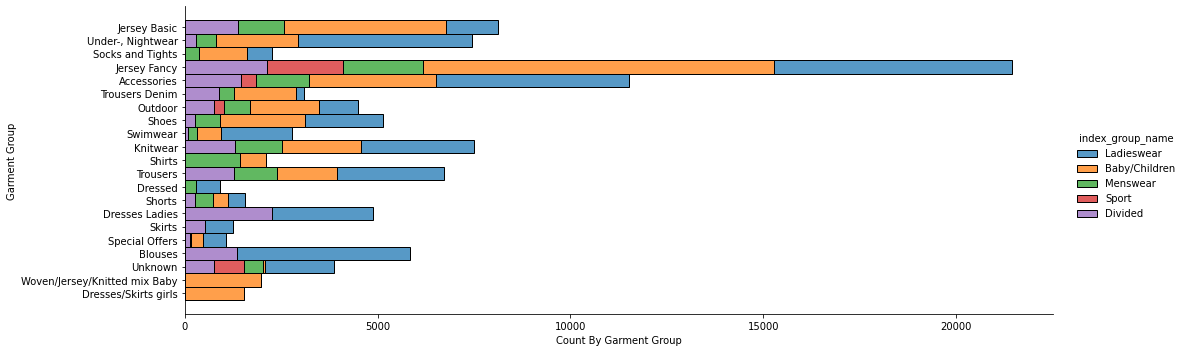

In [ ]:
#@title {display-mode: "form"}
ax = sns.displot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple='stack', aspect=3)
ax.set_axis_labels('Count By Garment Group', 'Garment Group')

Total number of products in each category (index_group_name) and subcategory (index_name)
(feature names are really confusing...)

In [ ]:
#@title
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Product counts in each category (product_group_name), equivalent of the second plot.

In [ ]:
#@title
articles.groupby('product_group_name').count()['index_group_name']

product_group_name
Accessories              11158
Bags                        25
Cosmetic                    49
Fun                          2
Furniture                   13
Garment Full body        13292
Garment Lower body       19812
Garment Upper body       42741
Garment and Shoe care        9
Interior textile             3
Items                       17
Nightwear                 1899
Shoes                     5283
Socks & Tights            2442
Stationery                   5
Swimwear                  3127
Underwear                 5490
Underwear/nightwear         54
Unknown                    121
Name: index_group_name, dtype: int64

In [ ]:
#@title
print("Number of unique categories in index_group_name (ladieswear, menswear etc): ",articles['index_group_name'].nunique())
print("Number of unique colours:", articles['colour_group_name'].nunique())
print("Number of unique product categories (shoes, accessories, underwear etc): ", articles["product_group_name"].nunique())
print("Number of unique product subcategory (boots - sneakers, bras - boxers etc): ", articles['product_type_name'].nunique())

Number of unique categories in index_group_name (ladieswear, menswear etc):  5
Number of unique colours: 50
Number of unique product categories (shoes, accessories, underwear etc):  19
Number of unique product subcategory (boots - sneakers, bras - boxers etc):  131


## Customers Data

In [ ]:
#@title {display-mode: "form"}
print("The shape of the customers data is:",customers.shape)

The shape of the customers data is: (1371980, 7)


Let's take a look at the data and see what the features are.

In [ ]:
#@title {display-mode: "form"}
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


The customers data stores the customer id's, their membership informations for H&M and some personal information, customer metadata. Let's take a look.
-  customer_id(int): The id of each customer in the database
-  FN(categorical): ?
-  Active(categorical): ?
-  club_member_status(categorical): Whether the customer is using an h&m card actively?
-  fashion_news_frequency(categorical): How frequently the customer is notified of new products, sales etc.? (regularly, monthly)
-  age(int): The age of each customer
-  postal_code(str): Postal code of each customer, can be duplicates

In [ ]:
#@title {display-mode: "form"}
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


The row count we got from the shape and info is 1371980 so we can see from the info results, we've a lot of missing values in FN and Active columns, and also some missing values in columns 3, 4 and 5. Let's examine those and the unique values in those columns to better understand what they represent before we sum up the features.

- Unique values in the 'fashion_news_frequency' column and their distributions are:

In [ ]:
#@title {display-mode: "form"}
print("The entries in fashion_news_frequency and their distributions are:\n", customers['fashion_news_frequency'].value_counts(), "\n")
print("The number of null values in fashion_news_frequency are:", customers['fashion_news_frequency'].isnull().sum(), "\n")
print("The null values make up ", "{:.2f}".format((customers['fashion_news_frequency'].isnull().sum()*100)/len(customers['fashion_news_frequency'])),"%\n")
#print(((customers['fashion_news_frequency'] == 'NONE').count()*100/len(customers['fashion_news_frequency'])) ,"% of the customers do not get any notifications for sales or new products.")
print("{:.2f}".format((877711*100)/1355971), "% of the customers do not get any notifications for sales or new products.")

The entries in fashion_news_frequency and their distributions are:
 NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64 

The number of null values in fashion_news_frequency are: 16009 

The null values make up  1.17 %

64.73 % of the customers do not get any notifications for sales or new products.


In [ ]:
#@title {display-mode: "form"}
customers[customers['fashion_news_frequency'] == 'NONE'].sum()

There are 16k data points missing in this column but since the dataset is pretty large, that makes up of only 1.17% of the whole column and that's permissable. Let me just replace the 2 None values with NONE so that it is consistent.

In [ ]:
#@title {display-mode: "form"}
customers['fashion_news_frequency'] = customers['fashion_news_frequency'].replace(['None'], 'NONE')
print("The entries in fashion_news_frequency and their distributions are:\n", customers['fashion_news_frequency'].value_counts(), "\n")

The entries in fashion_news_frequency and their distributions are:
 NONE         877713
Regularly    477416
Monthly         842
Name: fashion_news_frequency, dtype: int64 



There we go.

Let's now look at the worst features, FN and Active.

In [ ]:
#@title {display-mode: "form"}
print("The entries in FN and their distributions are:\n", customers['FN'].value_counts(), "\n")
print("The number of null values in FN are:", customers['FN'].isnull().sum(), "\n")
print("The null values make up ", "{:.2f}".format((customers['FN'].isnull().sum()*100)/len(customers['FN'])),"%")

The entries in FN and their distributions are:
 1.0    476930
Name: FN, dtype: int64 

The number of null values in FN are: 895050 

The null values make up  65.24 %


More than half of the FN column is null and we don't know what the feature represents so it looks like a good idea to discard it.

In [ ]:
#@title {display-mode: "form"}
print("The entries in Active and their distributions are:\n", customers['Active'].value_counts(), "\n")
print("The number of null values in Active are:", customers['Active'].isnull().sum(), "\n")
print("The null values make up ", "{:.2f}".format((customers['Active'].isnull().sum()*100)/len(customers['Active'])),"%")

The entries in Active and their distributions are:
 1.0    464404
Name: Active, dtype: int64 

The number of null values in Active are: 907576 

The null values make up  66.15 %


Same with the Active column, 66.15% is null. I'd guess that this column represents that the customer is active(1.0) if they shop at h&m at some predetermined frequency but still having a column with 90k null values is not good.

Let's see the age distribution and how many people did not register their age so that we can maybe impute the null values for this.

In [ ]:
#@title {display-mode: "form"}
print("The number of null values in age are:", customers['age'].isnull().sum(), "\n")
print("The null values make up ", "{:.2f}".format((customers['age'].isnull().sum()*100)/len(customers['age'])),"%")

The number of null values in age are: 15861 

The null values make up  1.16 %


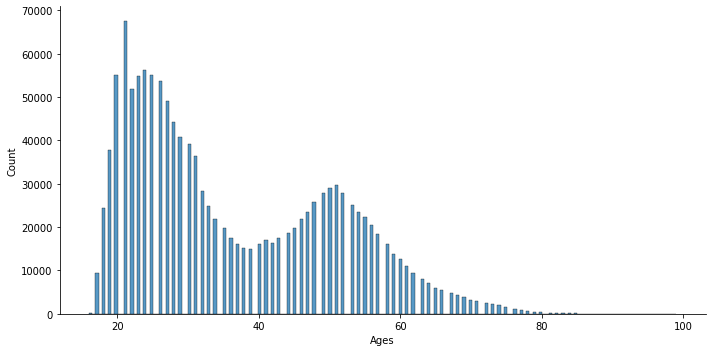

In [ ]:
#@title {display-mode: "form"}
age_plot = sns.displot(data=customers, x='age', aspect=2)
age_plot.set_axis_labels('Ages', 'Count')
plt.show()

Most of the customers are between ages 20 and 30, a significant amount is between 45-55.Let's take a closer look into the age data, see some descriptive statistics and examine the outliers. We can replace the outliers with the mean or median value of the age column, depending on which one represents the age better. But we can also remove them if we want since the number of outliers is really low, probably < 1%.

Let's bin the age values and see how they're grouped

In [ ]:
#@title {display-mode: "form"}
print("Range Of Ages    Count\n")
customers['age'].value_counts(bins=10, ascending=False)

Range Of Ages    Count



(15.916, 24.3]    357169
(24.3, 32.6]      346715
(49.2, 57.5]      196469
(40.9, 49.2]      187960
(32.6, 40.9]      146283
(57.5, 65.8]       83956
(65.8, 74.1]       31583
(74.1, 82.4]        5388
(82.4, 90.7]         519
(90.7, 99.0]          77
Name: age, dtype: int64

In [ ]:
#@title {display-mode: "form"}
print("{:.2f}".format((703884*100)/1356119), "% of the customers are between the ages of 15.9 and 32.6")

51.90 % of the customers are between the ages of 15.9 and 32.6


The results of the describe function for the age column are a bit ugly so let's do some of them manually.

In [ ]:
#@title {display-mode: "form"}
print("Mean age value:", customers['age'].mean())
print("The median age value is:", customers['age'].median())
print("Standard deviation of age:", customers['age'].std())

Mean age value: 36.386964565794
The median age value is: 32.0
Standard deviation of age: 14.313627981635868


Now let's plot a boxplot for age.

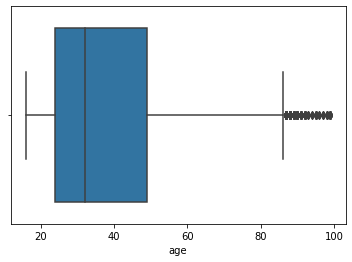

In [ ]:
#@title {display-mode: "form"}
sns.boxplot(data=customers, x='age')

There are outliers past the age 85 up to 100 and we can probably remove them, let's check how many there are first.

In [ ]:
customers[customers['age'] > 85].count()

customer_id               264
FN                         75
Active                     67
club_member_status        261
fashion_news_frequency    260
age                       264
postal_code               264
dtype: int64

In [ ]:
customers['customer_id'].nunique()

1371980

Since each customer_id is unique in the dataset and the age filter returned 264 customer_id's, we can say that there are 264 rows with age > 85 so 264 outliers which is 0.02% of the whole dataset.

In [ ]:
customers.drop(customers[customers['age'] > 85].index, inplace=True)

In [ ]:
customers[customers['age'] > 85]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code


Done and done. Now we don't get anything when we apply the >85 filter to the age column. That is because we set the inplace parameter to True, which does whatever change we are doing over the original dataframe and does not return a copy of it.

Of course my evaluation here about the outliers is just based on my examination of the boxplot, preferably we should've calculated the interquartile range and did a more thorough analysis before coming to a decision.

In [ ]:
#@title {display-mode: "form"}
customers.groupby('age', as_index=False).count()

,age,customer_id,FN,Active,club_member_status,fashion_news_frequency,postal_code
0,16.0,161,74,73,159,161,161
1,17.0,9392,2981,2924,9379,9367,9392
2,18.0,24323,8105,7860,24295,23930,24323
3,19.0,37707,15070,14515,37627,37380,37707
4,20.0,55196,21915,21091,55050,54701,55196
...,...,...,...,...,...,...,...
65,81.0,298,129,122,297,296,298
66,82.0,218,86,82,217,215,218
67,83.0,124,50,49,124,120,124
68,84.0,113,42,40,112,112,113


Let's move on to the postal codes now.

In [ ]:
customers['postal_code'].nunique()

352856

352856 unique postal codes. Let's also check the customers distribution for each of them by grouping the rows by postal_code and counting the customer_id's since they are all unique.

In [ ]:
#@title {display-mode: "form"}
customers.groupby('postal_code', as_index=True).count().sort_values('customer_id', ascending=False)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
postal_code,,,,,,
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c,120255,42854,39869,118233,114330,117954
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8,261,109,104,261,261,260
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1,159,90,88,159,159,158
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7,157,55,54,157,156,156
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145,156,42,41,156,156,155
...,...,...,...,...,...,...
881061848febc0ed07abec4002622bc86159c9c454e24a9ccceadf5073e2b60b,1,0,0,1,1,1
881060db7f12243d490fee451bd9f97f3e25b99ae2b4780ee895e96d78df3c4a,1,1,1,1,1,1
880f38c05ecb753e71f474a6394775192884cc57f35f1a0f79ddb3190a64ecf3,1,0,0,1,1,1


1.2 million of 1.37 million customers are registered with the postal_code starting with 2c29. The postal_code column is not likely to provide us any insight.

## Transactions

In [65]:
pd.set_option('display.float_format', '{:.4f}'.format) #Format to make the describe results more readable, affects everything below
transactions.describe()

,article_id,price,sales_channel_id
count,31788324.0000,31788324.0000,31788324.0000
mean,696227219.0051,0.0278,1.7040
std,133448003.4874,0.0192,0.4565
min,108775015.0000,0.0000,1.0000
25%,632803008.0000,0.0158,1.0000
50%,714582003.0000,0.0254,2.0000
75%,786524001.0000,0.0339,2.0000
max,956217002.0000,0.5915,2.0000


In [ ]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2


In [ ]:
transactions_for_each_cust = transactions.groupby('customer_id').count()

Here are the top customers. The number one customer has made 1895 transactions.

In [ ]:
transactions_for_each_cust.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

In [ ]:
num_one_cust_transactions = pd.DataFrame(transactions[transactions['customer_id'] == '000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318'])

In [ ]:
print("Total number of transactions for the number one customer:", num_one_cust_transactions.shape[0])
print("Of those transactions, sales made using sales_channel_id 2:", (num_one_cust_transactions['sales_channel_id'] == 2).count())

Total number of transactions for the number one customer: 18
Of those transactions, sales made using sales_channel_id 2: 18


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


31788324 rows and 5 features in the transactions data.

Transactions Features:
-  <b>t_dat (object):</b> Date of the transactions. Can be converted to datetime?
-  <b>customer_id</b>
-  <b>article_id (int):</b> Id of the clothing bought
-  <b>price(int)</b>: Price of the clothing item
-  <b>sales_channel_id(categorical):</b>Sales Channel Category (store, online) - values are 1 and 2, we do not know which is which.

In [ ]:
print("Percentage of transactions from sales channel 1:", "{:.1f}".format((transactions[transactions['sales_channel_id'] == 1]['sales_channel_id'].count()*100)/transactions['sales_channel_id'].count()))
print(f"Percentage of transactions from sales channel 2:", "{:.1f}".format((transactions[transactions['sales_channel_id'] == 2]['sales_channel_id'].count()*100)/transactions['sales_channel_id'].count()))

Percentage of transactions from sales channel 1: 29.6
Percentage of transactions from sales channel 2: 70.4


We can merge the articles and transactions dataframes to take a look at how popular each category/subcategory is. Let's get a subset of the features from the articles data and join them on the common article_id column.

In [ ]:
features_from_articles = articles[['article_id', 'product_type_name', 'product_group_name', 'index_name']]
articles_transactions_merged = features_from_articles.merge(transactions, on='article_id', how='left')

In [ ]:
articles_transactions_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31789319 entries, 0 to 31789318
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   article_id          int64  
 1   product_type_name   object 
 2   product_group_name  object 
 3   index_name          object 
 4   t_dat               object 
 5   customer_id         object 
 6   price               float64
 7   sales_channel_id    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 2.1+ GB


In [ ]:
articles_transactions_merged.head()

,article_id,product_type_name,product_group_name,index_name,t_dat,customer_id,price,sales_channel_id
0,108775015,Vest top,Garment Upper body,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.008458,1.0
1,108775015,Vest top,Garment Upper body,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.008458,1.0
2,108775015,Vest top,Garment Upper body,Ladieswear,2018-09-20,0aaa9683d5f45b85d0f9a81e2f4d4ef774fed43339fb75...,0.008068,2.0
3,108775015,Vest top,Garment Upper body,Ladieswear,2018-09-20,20ccafd82d923baecf1fb8705d459e243c8ca9c74ee24e...,0.008458,1.0
4,108775015,Vest top,Garment Upper body,Ladieswear,2018-09-20,2135790e6b63d10b59f9d8b84a58e24328b0f5ed3a48f1...,0.008458,1.0


Let's see the most popular items now.

In [ ]:
articles_transactions_merged['article_id'].value_counts()

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
636664002        1
553800001        1
636672003        1
501129004        1
959461001        1
Name: article_id, Length: 105542, dtype: int64

In [ ]:
articles[articles['article_id'] == 706016001]  

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...


The item that has sold the most is a simple black trousers from the divided section. The other 4 are trousers, tops and soc

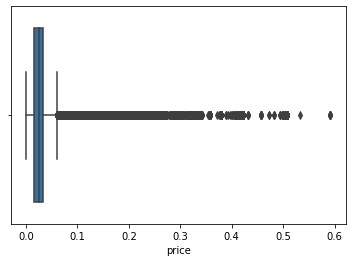

In [27]:
sns.boxplot(data=transactions, x='price')

### Price Outliers For Each Category

A lot of price variations and outliers in the Garment Upper/Lower Body categories as well as shoes and accessories. Let's take a closer look.

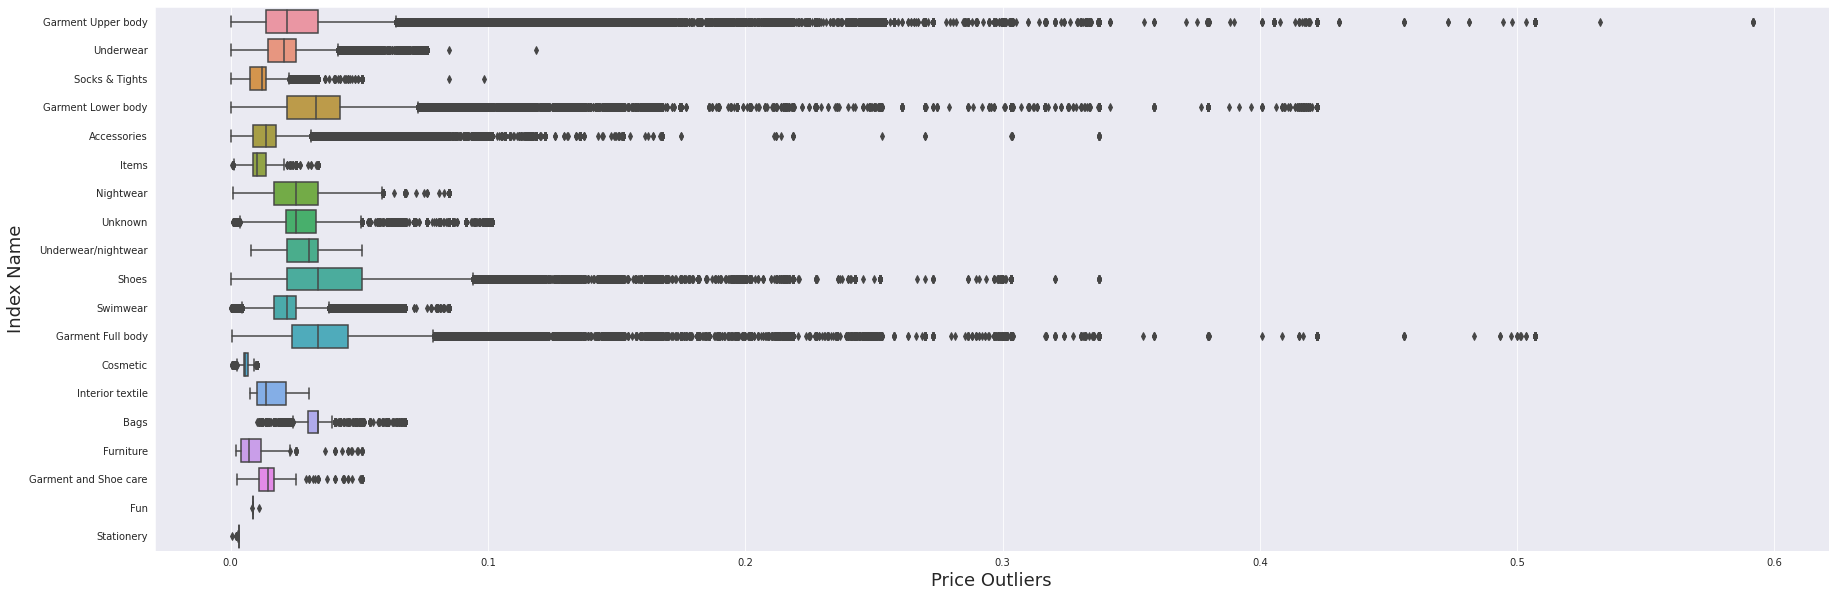

In [29]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(30,10))
ax = sns.boxplot(data=articles_transactions_merged, x='price', y='product_group_name')
ax.set_xlabel('Price Outliers', fontsize=18)
ax.set_ylabel('Category Name', fontsize=18)
plt.show()

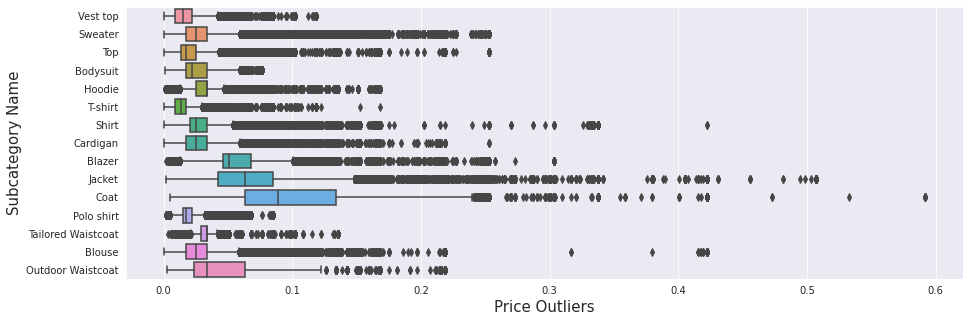

In [33]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(data=articles_transactions_merged[articles_transactions_merged['product_group_name'] == 'Garment Upper body'], x='price', y='product_type_name')
ax.set_xlabel('Price Outliers', fontsize=15)
ax.set_ylabel('Subcategory Name', fontsize=15)
plt.show()

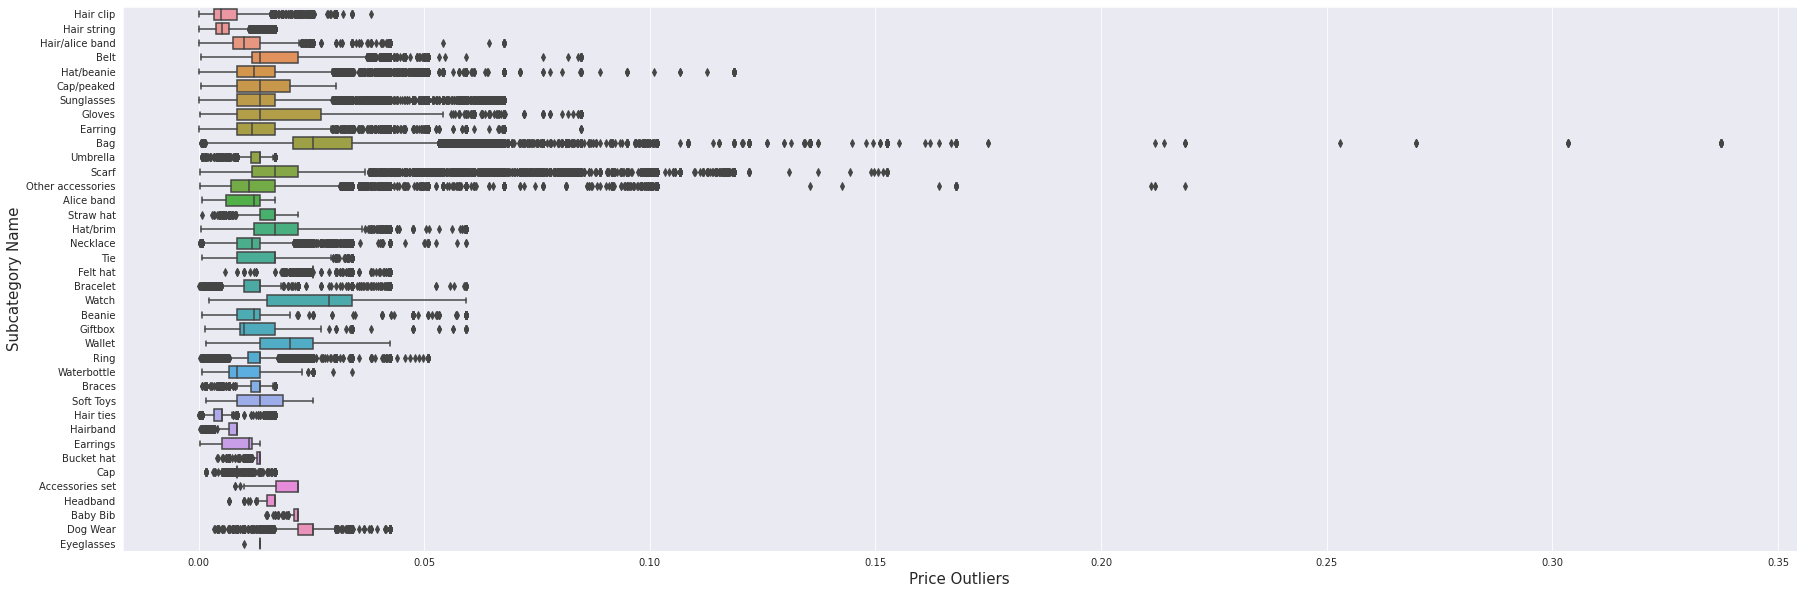

In [38]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.boxplot(data=articles_transactions_merged[articles_transactions_merged['product_group_name'] == 'Accessories'], x='price', y='product_type_name')
ax.set_xlabel('Price Outliers', fontsize=15)
ax.set_ylabel('Subcategory Name', fontsize=15)
plt.show()

Bags category has some extreme outliers followed by other accessories. The watches have the highest mean price which makes sense.

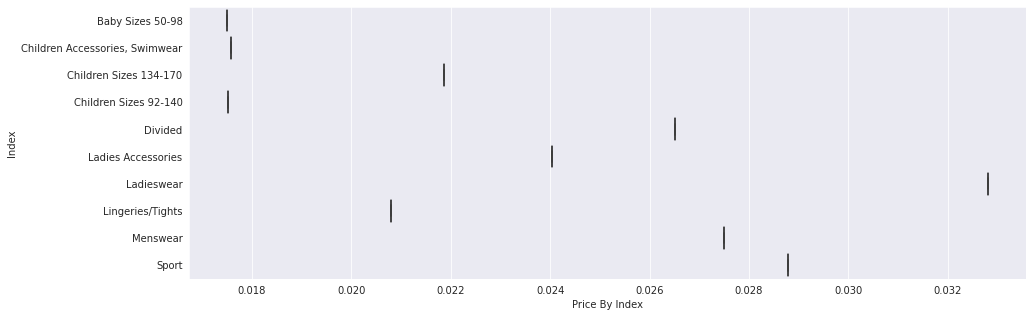

In [68]:
articles_mean = articles_transactions_merged[['index_name', 'price']].groupby('index_name').mean()
sns.set_style('darkgrid')
ax, fig = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(x=articles_mean.price, y=articles_mean.index)
ax.set_xlabel('Price By Index')
ax.set_ylabel('Index')
plt.show()

The highest mean price belongs to the Ladieswear group.

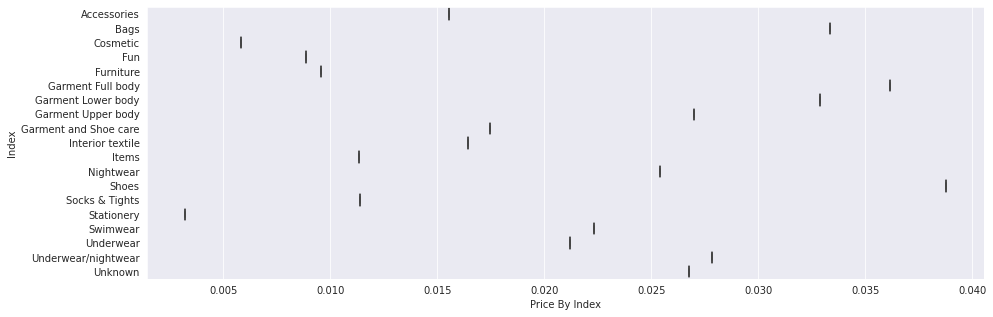

In [73]:
products_mean = articles_transactions_merged[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style('darkgrid')
ax, fig = plt.subplots(figsize=(15, 5))
ax = sns.boxplot(x=products_mean.price, y=products_mean.index)
ax.set_xlabel('Price By Index')
ax.set_ylabel('Index')
plt.show()

Garment Full Body, Shoes and Bags have the highest mean prices, accessories is not that high actually.